# EDA of MLB Baseball Data

## The analysis on 1985-2012 MLB data to see the factors to make a winning team.


In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes
import seaborn as sns
from scipy import stats 
import math
%matplotlib inline

### Load the baseball data set

In [283]:
# main dataset
data_path = 'C:\\Users\\YangMik\\Downloads\\Coursera\\IBM Machine Learning\\EDA\\baseballdatabank-master\\core\\Teams.csv'
original_teams_df = pd.read_csv(data_path)
print(original_teams_df.shape)
original_teams_df.info()

(2955, 48)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955 entries, 0 to 2954
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearID          2955 non-null   int64  
 1   lgID            2905 non-null   object 
 2   teamID          2955 non-null   object 
 3   franchID        2955 non-null   object 
 4   divID           1438 non-null   object 
 5   Rank            2955 non-null   int64  
 6   G               2955 non-null   int64  
 7   Ghome           2556 non-null   float64
 8   W               2955 non-null   int64  
 9   L               2955 non-null   int64  
 10  DivWin          1410 non-null   object 
 11  WCWin           774 non-null    object 
 12  LgWin           2927 non-null   object 
 13  WSWin           2598 non-null   object 
 14  R               2955 non-null   int64  
 15  AB              2955 non-null   int64  
 16  H               2955 non-null   int64  
 17  2B              2955 n

In [284]:
# Extract 1985-2012 data

# Make a data copy
team_df = original_teams_df.copy(deep=True)
team_df = team_df.loc[(team_df['yearID']>1984) & (team_df['yearID']<2013)]
# print(team_df.shape)

# Get necessary columns
unnecessary_columns = ['park', 'BPF', 'PPF', 'teamIDBR', 'teamIDlahman45', 'teamIDretro']
team_df.drop(columns=unnecessary_columns, axis=1, inplace=True)
print(team_df.shape)

(798, 42)


In [285]:
# Check correlation
corr_columns = ['W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B', '3B', \
                'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', \
                'ER', 'ERA', 'CG', 'SHO', 'SV', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP']
team_df[corr_columns].corr()

,W,L,R,AB,H,2B,3B,HR,BB,SO,...,CG,SHO,SV,HA,HRA,BBA,SOA,E,DP,FP
W,1.000000,-0.701145,0.582912,0.411887,0.501754,0.330347,0.058798,0.379475,0.492629,0.084654,...,0.101213,0.484777,0.687579,-0.084732,-0.154842,-0.199850,0.418006,-0.173751,0.022857,0.331059
L,-0.701145,1.000000,-0.290985,0.338459,0.030939,-0.006686,0.051323,-0.214472,-0.220231,0.264296,...,-0.079924,-0.330802,-0.440848,0.587115,0.356043,0.486949,-0.071258,0.378242,0.300158,-0.276190
R,0.582912,-0.290985,1.000000,0.510762,0.808361,0.655176,0.039864,0.753188,0.627639,0.195971,...,-0.125715,-0.086385,0.243771,0.454480,0.477781,0.219414,0.280061,-0.098035,0.285082,0.220742
AB,0.411887,0.338459,0.510762,1.000000,0.815225,0.525947,0.142016,0.307530,0.370549,0.426403,...,-0.011223,0.143260,0.300335,0.701022,0.332728,0.392797,0.450999,0.226610,0.441310,0.100353
H,0.501754,0.030939,0.808361,0.815225,1.000000,0.692192,0.152699,0.469499,0.409526,0.186067,...,-0.082923,0.013288,0.273602,0.638599,0.425406,0.310606,0.359692,0.046945,0.394881,0.180594
2B,0.330347,-0.006686,0.655176,0.525947,0.692192,1.000000,0.041459,0.458746,0.313116,0.353040,...,-0.344077,-0.043044,0.152670,0.454493,0.419049,0.181648,0.443135,-0.163969,0.243803,0.294092
3B,0.058798,0.051323,0.039864,0.142016,0.152699,0.041459,1.000000,-0.207367,-0.072878,-0.011976,...,0.115027,0.064810,0.058087,0.066618,-0.059068,0.041003,-0.070542,0.115395,0.031745,-0.062778
HR,0.379475,-0.214472,0.753188,0.307530,0.469499,0.458746,-0.207367,1.000000,0.419549,0.382038,...,-0.234902,-0.142948,0.139213,0.323233,0.518922,0.193059,0.331888,-0.168631,0.191843,0.231002
BB,0.492629,-0.220231,0.627639,0.370549,0.409526,0.313116,-0.072878,0.419549,1.000000,0.228685,...,0.025585,0.022756,0.233556,0.250313,0.182769,0.219573,0.207161,-0.013090,0.184986,0.141054
SO,0.084654,0.264296,0.195971,0.426403,0.186067,0.353040,-0.011976,0.382038,0.228685,1.000000,...,-0.420875,-0.006942,0.090461,0.343624,0.355102,0.244119,0.560135,-0.028119,0.128435,0.162079


### Combine team payroll data
#### We want to analyze the correlation among performance indexes, team payroll and wins.

In [286]:
# Payroll data
payroll_data_path = 'C:\\Users\\YangMik\\Downloads\\Coursera\\IBM Machine Learning\\EDA\\baseballdatabank-master\\core\\Salaries.csv'

payroll_df_backup = pd.read_csv(payroll_data_path)
payroll_df = payroll_df_backup.copy(deep=True)

# payroll_df.info()
payroll_df = payroll_df.loc[payroll_df['yearID']<=2012]

payroll_df = payroll_df.groupby(by=['yearID', 'teamID']).sum()
payroll_df = payroll_df.reset_index()

# merge payroll data with team data
team_df = team_df.merge(payroll_df, on=['yearID', 'teamID'])
team_df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,HA,HRA,BBA,SOA,E,DP,FP,name,attendance,salary
0,1985,NL,ATL,ATL,W,5,162,81.0,66,96,...,1512,134,642,776,159,197,0.976,Atlanta Braves,1350137.0,14807000
1,1985,AL,BAL,BAL,E,4,161,81.0,83,78,...,1480,160,568,793,129,168,0.979,Baltimore Orioles,2132387.0,11560712
2,1985,AL,BOS,BOS,E,5,163,81.0,81,81,...,1487,130,540,913,145,161,0.977,Boston Red Sox,1786633.0,10897560
3,1985,AL,CAL,ANA,W,2,162,79.0,90,72,...,1453,171,514,767,112,202,0.982,California Angels,2567427.0,14427894
4,1985,AL,CHA,CHW,W,3,163,81.0,85,77,...,1411,161,569,1023,111,152,0.982,Chicago White Sox,1669888.0,9846178


In [287]:
team_df.shape

(798, 43)

In [288]:
team_df.columns

Index(['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome',
       'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B',
       '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP',
       'name', 'attendance', 'salary'],
      dtype='object')

### Check for missing data

In [289]:
def check_missing_value(team_df):
    print(team_df.isnull().sum())
    print('Year with no division win value:')
    print(team_df.loc[team_df['DivWin'].isnull()].groupby('yearID').sum().index.array)
    print('Year with no wild card win value:')
    print(team_df.loc[team_df['WCWin'].isnull()].groupby('yearID').sum().index.array)
    print('Year with no league win value:')
    print(team_df.loc[team_df['LgWin'].isnull()].groupby('yearID').sum().index.array)
    print('Year with no world series win value:')
    print(team_df.loc[team_df['WSWin'].isnull()].groupby('yearID').sum().index.array)

check_missing_value(team_df)

yearID          0
lgID            0
teamID          0
franchID        0
divID           0
Rank            0
G               0
Ghome           0
W               0
L               0
DivWin         28
WCWin         264
LgWin          28
WSWin          28
R               0
AB              0
H               0
2B              0
3B              0
HR              0
BB              0
SO              0
SB              0
CS              0
HBP             0
SF              0
RA              0
ER              0
ERA             0
CG              0
SHO             0
SV              0
IPouts          0
HA              0
HRA             0
BBA             0
SOA             0
E               0
DP              0
FP              0
name            0
attendance      0
salary          0
dtype: int64
Year with no division win value:
<PandasArray>
[1994]
Length: 1, dtype: int64
Year with no wild card win value:
<PandasArray>
[1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994]
Length: 10, dtype: int64
Y

### In 1994 the season was interrupted due to strike, therefore there was no division, league and world series winner. Also 1994 was the first yeart to introduce wild card.

#### The wild card was first instituted in MLB in 1994, with one wild card team per league advancing to the Division Series in the postseason to face a division winner. In 2012, the system was modified to add a second wild card team per league and pit each league's wild card teams against each other in a play-in game — the MLB Wild Card Game — the winner of which would then advance to the Division Series and play the team with the best record. 

#### For missing DivWin, LgWin, and WSWin values in 1994, we reset them to N. For missing WCWin values from 1985 to 1994, we also reset them to N. 

In [290]:
# Reset the values.
# Reset missing DivWin values in 1994
team_df.loc[team_df['yearID']==1994, 'DivWin'] = 'N'
# Reset missing WSWin values in and before 1994
team_df.loc[team_df['yearID']<=1994, 'WCWin'] = 'N'
# Reset missing LgWin values in 1994
team_df.loc[team_df['yearID']==1994, 'LgWin'] = 'N'
# Reset missing WSWin values in 1994
team_df.loc[team_df['yearID']==1994, 'WSWin'] = 'N'
team_df.loc[team_df['yearID']==1994][['DivWin', 'WCWin', 'LgWin', 'WSWin']]

,DivWin,WCWin,LgWin,WSWin
236,N,N,N,N
237,N,N,N,N
238,N,N,N,N
239,N,N,N,N
240,N,N,N,N
241,N,N,N,N
242,N,N,N,N
243,N,N,N,N
244,N,N,N,N
245,N,N,N,N


### Re-check missing value and reset index

In [291]:
print(check_missing_value(team_df))

yearID        0
lgID          0
teamID        0
franchID      0
divID         0
Rank          0
G             0
Ghome         0
W             0
L             0
DivWin        0
WCWin         0
LgWin         0
WSWin         0
R             0
AB            0
H             0
2B            0
3B            0
HR            0
BB            0
SO            0
SB            0
CS            0
HBP           0
SF            0
RA            0
ER            0
ERA           0
CG            0
SHO           0
SV            0
IPouts        0
HA            0
HRA           0
BBA           0
SOA           0
E             0
DP            0
FP            0
name          0
attendance    0
salary        0
dtype: int64
Year with no division win value:
<PandasArray>
[]
Length: 0, dtype: int64
Year with no wild card win value:
<PandasArray>
[]
Length: 0, dtype: int64
Year with no league win value:
<PandasArray>
[]
Length: 0, dtype: int64
Year with no world series win value:
<PandasArray>
[]
Length: 0, dtype: int64


### Create domain data

In [292]:
# Create domain data
# Calculate OPS, OBP and SLG as critical batting indexes.
# OPS = OBP + SLG
# OBP (On-Base Percentage) =（H + BB + HBP）/（AB + BB + HBP + SF）
# SLG (Slugging Percentage) = ((1*H)+(2*2B)+(3*3B)+(4*HR))/AB
team_df['OBP'] = (team_df['H']+team_df['BB']+team_df['HBP'])/(team_df['AB']+team_df['BB']+team_df['HBP']+team_df['SF'])
team_df['SLG'] = ((team_df['H'])+(2*team_df['2B'])+(3*team_df['3B'])+(4*team_df['HR']))/team_df['AB']
team_df['OPS'] = team_df['OBP'] + team_df['SLG']
print(team_df.shape)
team_df

(798, 46)


,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,SOA,E,DP,FP,name,attendance,salary,OBP,SLG,OPS
0,1985,NL,ATL,ATL,W,5,162,81.0,66,96,...,776,159,197,0.976,Atlanta Braves,1350137.0,14807000,0.314881,0.429425,0.744306
1,1985,AL,BAL,BAL,E,4,161,81.0,83,78,...,793,129,168,0.979,Baltimore Orioles,2132387.0,11560712,0.335599,0.514954,0.850552
2,1985,AL,BOS,BOS,E,5,163,81.0,81,81,...,913,145,161,0.977,Boston Red Sox,1786633.0,10897560,0.346522,0.513986,0.860508
3,1985,AL,CAL,ANA,W,2,162,79.0,90,72,...,767,112,202,0.982,California Angels,2567427.0,14427894,0.332738,0.459206,0.791945
4,1985,AL,CHA,CHW,W,3,163,81.0,85,77,...,1023,111,152,0.982,Chicago White Sox,1669888.0,9846178,0.315143,0.470750,0.785893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,2012,NL,SLN,STL,C,2,162,81.0,88,74,...,1218,107,149,0.983,St. Louis Cardinals,3262109.0,110300862,0.337542,0.507471,0.845013
794,2012,AL,TBA,TBD,E,3,162,81.0,90,72,...,1383,114,155,0.981,Tampa Bay Rays,1559681.0,64173500,0.316691,0.478511,0.795202
795,2012,AL,TEX,TEX,W,2,162,81.0,93,69,...,1286,85,136,0.986,Texas Rangers,3460280.0,120510974,0.333603,0.541682,0.875285
796,2012,AL,TOR,TOR,E,4,162,81.0,73,89,...,1142,101,167,0.984,Toronto Blue Jays,2099663.0,75009200,0.309241,0.491708,0.800949


### Check for outlier

In [293]:
# Check for outlier
# check data distribution

columns = ['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', \
'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP', 'salary', 'OBP', \
          'SLG', 'OPS']

def get_scatter(data_df, x_columns):
    j=0
    d=0
    while (j<=5):
        figure, axs = plt.subplots(1, 5)
        figure.set_figheight(5)
        figure.set_figwidth(15)
    
        for i, column in enumerate(columns[d:d+5]):
            axs[i].scatter(column, 'W', data=data_df)
            axs[i].set_xlabel(column)
        
        j+=1
        d+=5

def get_hist(data_df, x_columns):
    j=0
    d=0
    while (j<=5):
        figure, axs = plt.subplots(1, 5)
        figure.set_figheight(5)
        figure.set_figwidth(10)
    
        for i, column in enumerate(columns[d:d+5]):
            axs[i].hist(column, data=data_df)
            axs[i].set_xlabel(column)
        
        j+=1
        d+=5

def get_box(df, columns):
    j=0
    d=0
    while (j<=5):
        figure, axs = plt.subplots(1, 5)
        figure.set_figheight(5)
        figure.set_figwidth(18)
    
        for i, column in enumerate(columns[d:d+5]):
            axs[i].boxplot(df[column], 0, 'gD', showmeans=True)
            axs[i].set_title(column)
        
        j+=1
        d+=5        
        

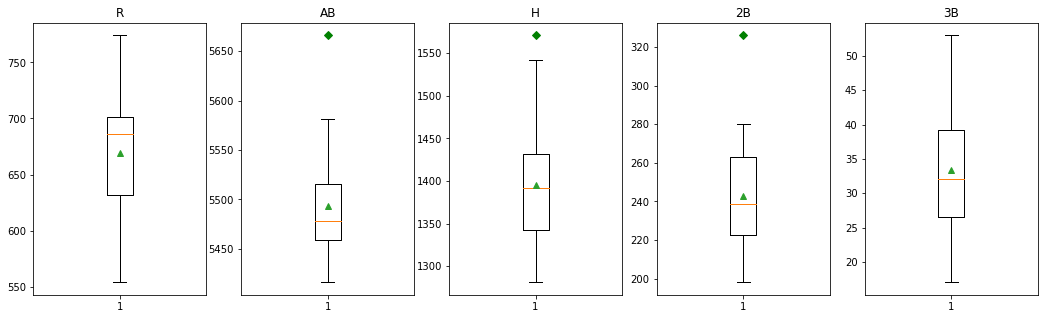

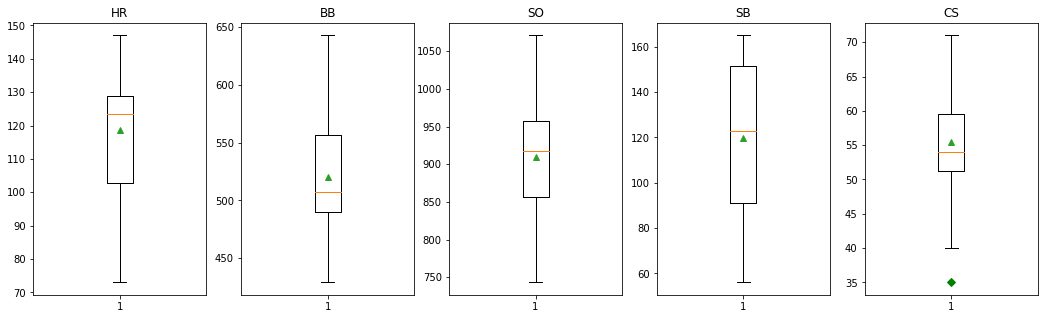

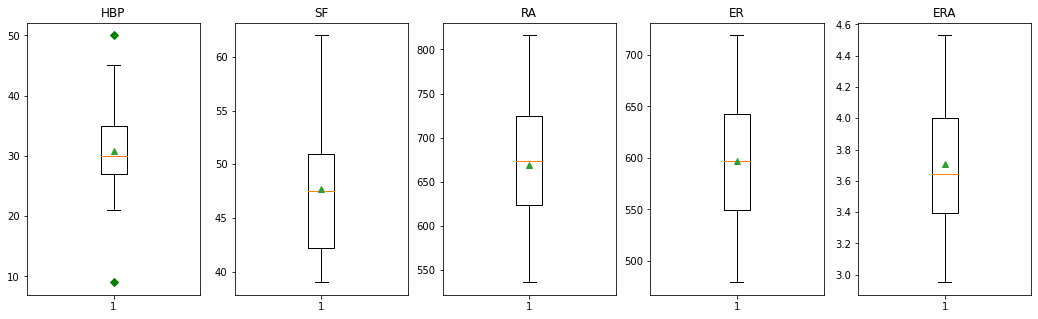

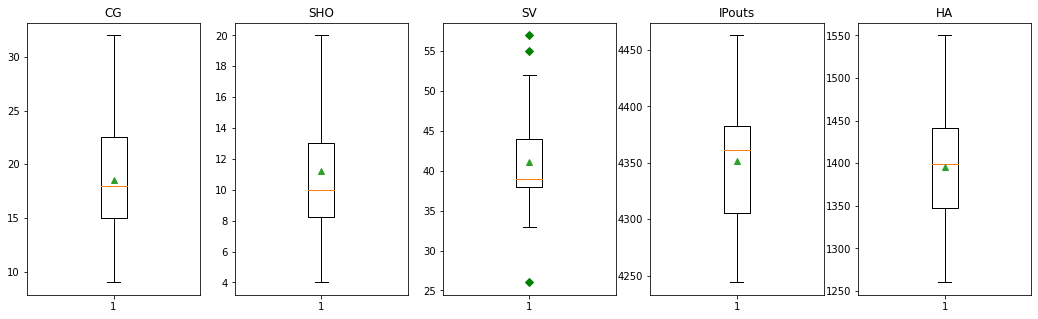

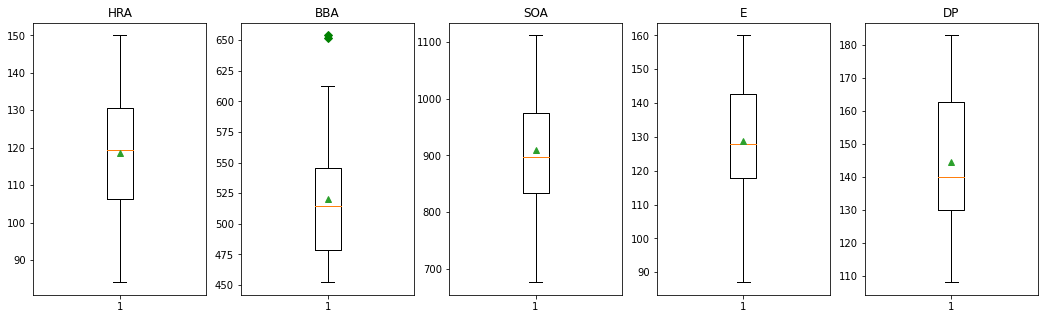

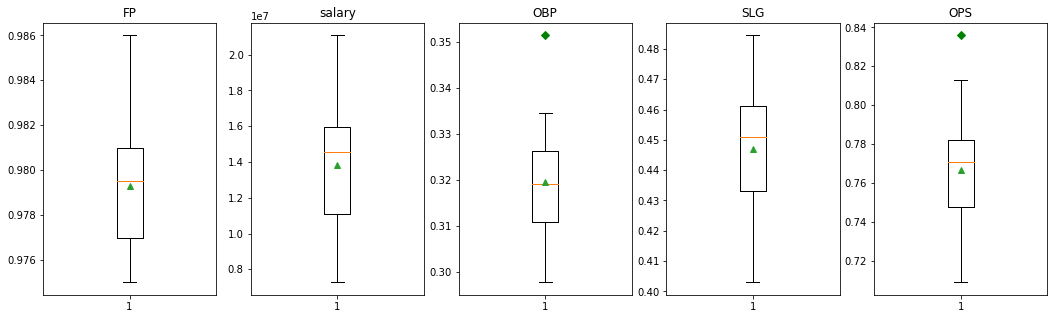

In [294]:
# Use histogram, boxplot and scatter plot to check outlier.
df_1989 = team_df.loc[team_df['yearID']==1989]
df_1990 = team_df.loc[team_df['yearID']==1990]

# get_scatter(tmp_df, columns)
# get_hist(df_1989, columns)
get_box(df_1989, columns)
# get_box(df_1990, columns)

In [295]:
def show_categorical(data_df, columns):
    colors = ['Pink', 'Yellow']
#     j = len(columns)/2
    figure, axs = plt.subplots(1, len(columns))
    figure.set_figwidth(10)
    for i, column in enumerate(columns):
        x = team_df[column].value_counts()
        axs[j, i].pie(x, labels=['Not '+column, column], autopct='%.0f%%', colors=colors, radius=2)
   

([<matplotlib.patches.Wedge at 0x1cab3f2c7f0>,
 [Text(-1.6406875009560975, 0.17505577455895605, 'Not WSWin'),
  Text(1.6406875071023106, -0.17505571695436148, 'WSWin')],
 [Text(-0.8949204550669622, 0.09548496794124874, '96.6%'),
  Text(0.894920458419442, -0.0954849365205608, '3.4%')])

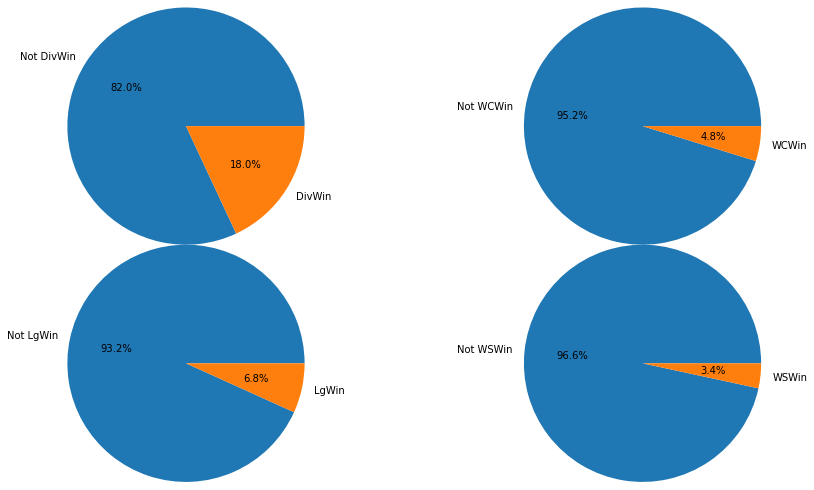

In [296]:
colors = ['Pink', 'Yellow']
columns=['DivWin', 'WCWin', 'LgWin', 'WSWin']
# show_categorical(team_df, columns)
figure, axs = plt.subplots(2,2)
figure.set_figwidth(15)
figure.set_figheight(8)
axs[0,0].pie(team_df['DivWin'].value_counts(), labels=['Not DivWin', 'DivWin'], autopct='%1.1f%%', radius=1.5)
axs[0,1].pie(team_df['WCWin'].value_counts(), labels=['Not WCWin', 'WCWin'], autopct='%1.1f%%', radius=1.5)
axs[1,0].pie(team_df['LgWin'].value_counts(), labels=['Not LgWin', 'LgWin'], autopct='%1.1f%%', radius=1.5)
axs[1,1].pie(team_df['WSWin'].value_counts(), labels=['Not WSWin', 'WSWin'], autopct='%1.1f%%', radius=1.5)

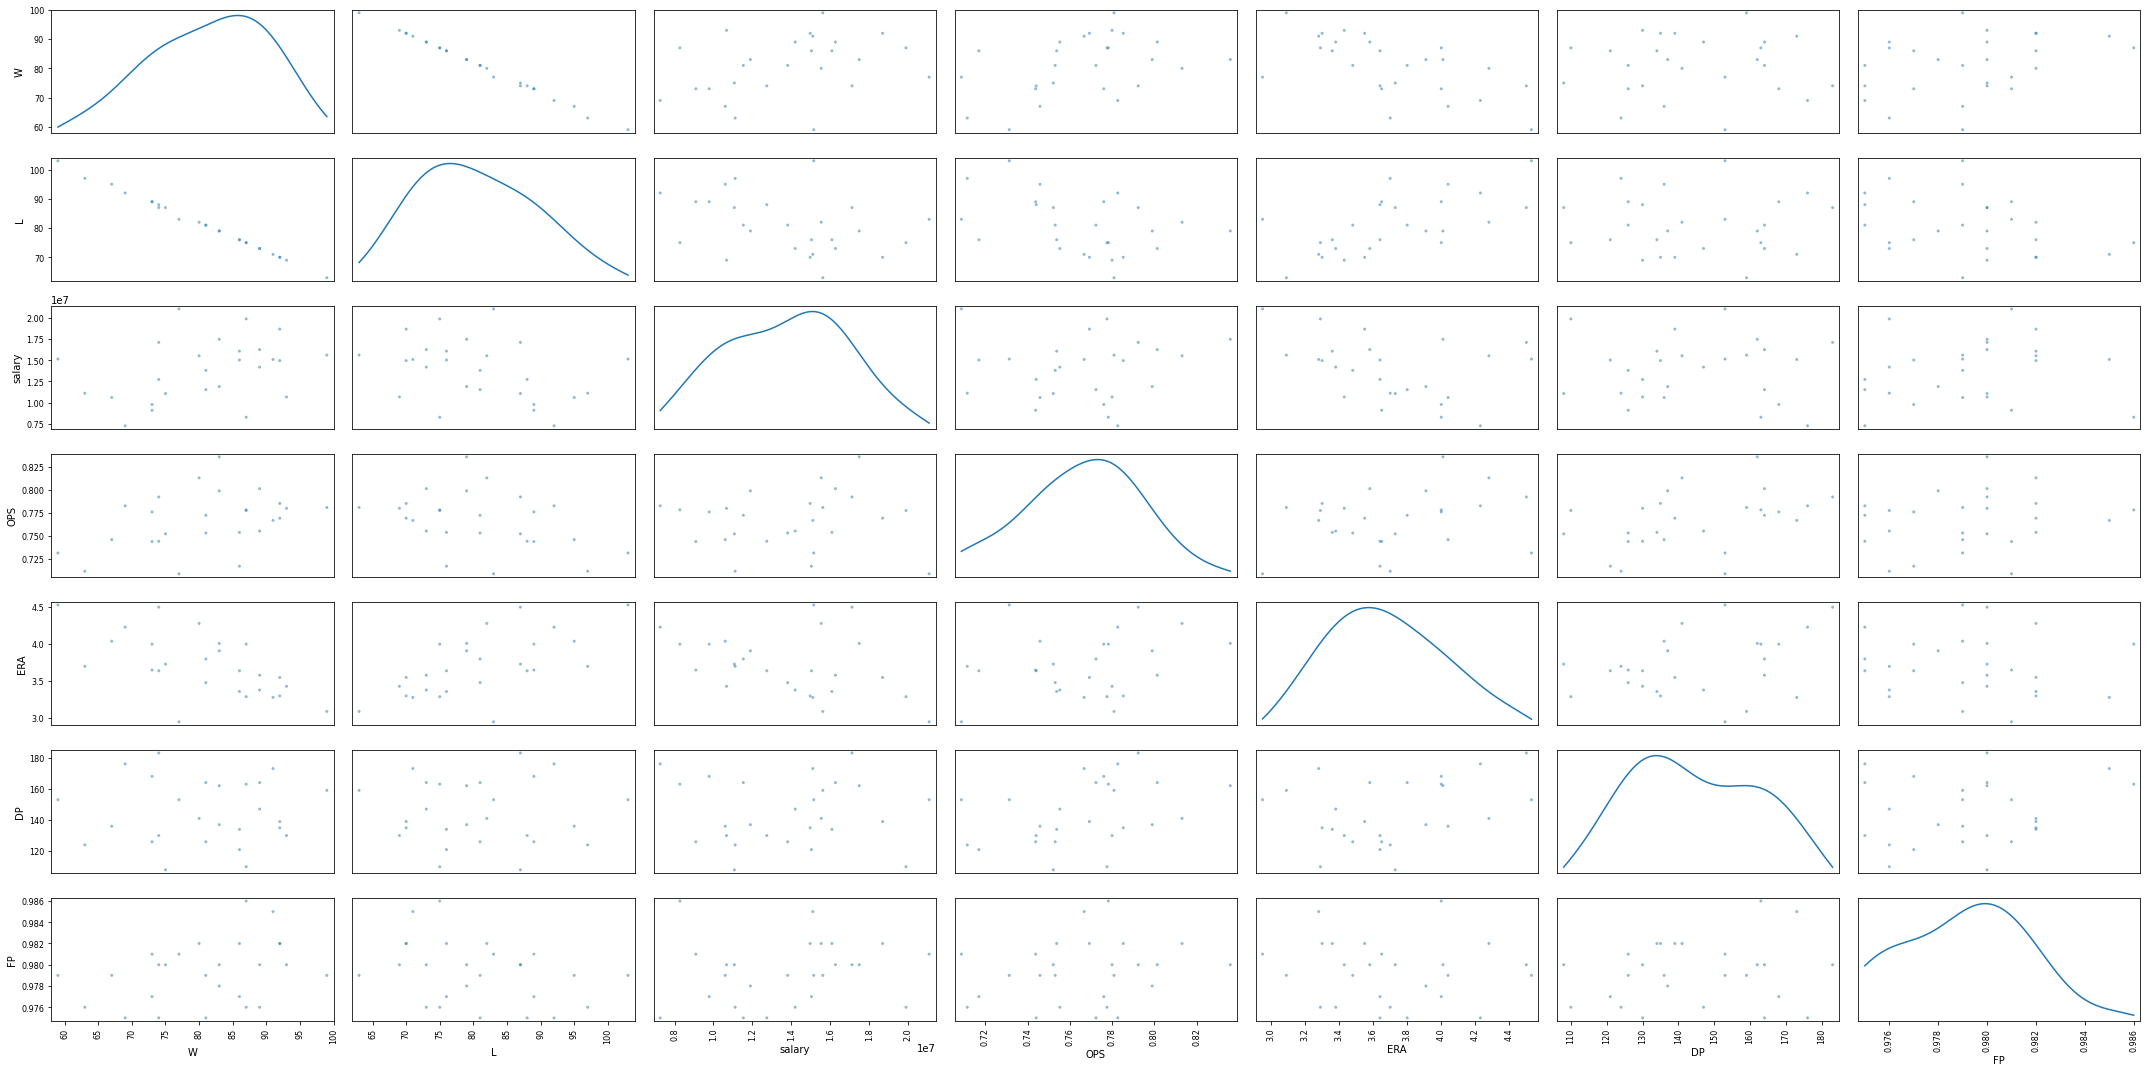

In [297]:
from pandas.plotting import scatter_matrix
# heatmap

# columns = ['W', 'L', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', \
# 'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP', 'salary', 'OBP', \
#           'SLG', 'OPS']

columns = ['W', 'L', 'salary', 'OPS', 'ERA', 'DP', 'FP']
# sns.set_context({"figure.figsize":(8,8)})
# # sns.set_theme()
# sns.heatmap(team_df.loc[team_df['yearID']==1989][columns])

# team_df.corr()

scatter_matrix(team_df.loc[team_df['yearID']==1989][columns], diagonal="kde", 
               figsize=(30,15))
plt.tight_layout()
# plt.show()

### Feature engineering

In [198]:
# Transform categorical columns to numeric features.

team_df['DivWin'].replace(to_replace={'N':0, 'Y':1}, inplace=True)
team_df['WCWin'].replace(to_replace={'N':0, 'Y':1}, inplace=True)
team_df['LgWin'].replace(to_replace={'N':0, 'Y':1}, inplace=True)
team_df['WSWin'].replace(to_replace={'N':0, 'Y':1}, inplace=True)
team_df[['yearID', 'name', 'DivWin', 'WCWin', 'LgWin', 'WSWin']]

,yearID,name,DivWin,WCWin,LgWin,WSWin
0,1985,Atlanta Braves,0,0,0,0
1,1985,Baltimore Orioles,0,0,0,0
2,1985,Boston Red Sox,0,0,0,0
3,1985,California Angels,0,0,0,0
4,1985,Chicago White Sox,0,0,0,0
...,...,...,...,...,...,...
793,2012,St. Louis Cardinals,0,1,0,0
794,2012,Tampa Bay Rays,0,0,0,0
795,2012,Texas Rangers,0,1,0,0
796,2012,Toronto Blue Jays,0,0,0,0


In [199]:
# Create dummy values
team_df = pd.get_dummies(columns=['lgID', 'divID'], data=team_df)
team_df

,yearID,teamID,franchID,Rank,G,Ghome,W,L,DivWin,WCWin,...,attendance,salary,OBP,SLG,OPS,lgID_AL,lgID_NL,divID_C,divID_E,divID_W
0,1985,ATL,ATL,5,162,81.0,66,96,0,0,...,1350137.0,14807000,0.314881,0.429425,0.744306,0,1,0,0,1
1,1985,BAL,BAL,4,161,81.0,83,78,0,0,...,2132387.0,11560712,0.335599,0.514954,0.850552,1,0,0,1,0
2,1985,BOS,BOS,5,163,81.0,81,81,0,0,...,1786633.0,10897560,0.346522,0.513986,0.860508,1,0,0,1,0
3,1985,CAL,ANA,2,162,79.0,90,72,0,0,...,2567427.0,14427894,0.332738,0.459206,0.791945,1,0,0,0,1
4,1985,CHA,CHW,3,163,81.0,85,77,0,0,...,1669888.0,9846178,0.315143,0.470750,0.785893,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,2012,SLN,STL,2,162,81.0,88,74,0,1,...,3262109.0,110300862,0.337542,0.507471,0.845013,0,1,1,0,0
794,2012,TBA,TBD,3,162,81.0,90,72,0,0,...,1559681.0,64173500,0.316691,0.478511,0.795202,1,0,0,1,0
795,2012,TEX,TEX,2,162,81.0,93,69,0,1,...,3460280.0,120510974,0.333603,0.541682,0.875285,1,0,0,0,1
796,2012,TOR,TOR,4,162,81.0,73,89,0,0,...,2099663.0,75009200,0.309241,0.491708,0.800949,1,0,0,1,0


### Normalize the data set

In [201]:
from sklearn.preprocessing import StandardScaler
columns = ['W', 'L', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', \
'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP', 'salary', 'OBP', \
          'SLG', 'OPS']
scaler = StandardScaler()
X_standardized = scaler.fit_transform(team_df[columns])
# team_df.info()
x_df = pd.DataFrame(data=X_standardized, columns=columns)
x_df

left_df = team_df[['yearID', 'teamID', 'franchID', 'name', 'lgID_AL', 'lgID_NL', 'divID_C', 'divID_E', 'divID_W']]
left_df

mlb_df = left_df.merge(x_df, left_index=True, right_index=True)
mlb_df

,yearID,teamID,franchID,name,lgID_AL,lgID_NL,divID_C,divID_E,divID_W,W,...,HRA,BBA,SOA,E,DP,FP,salary,OBP,SLG,OPS
0,1985,ATL,ATL,Atlanta Braves,0,1,0,0,1,-1.149022,...,-0.759223,1.552650,-1.677700,2.389722,2.459523,-1.832542,-1.006642,-1.131250,-1.723177,-1.647013
1,1985,BAL,BAL,Baltimore Orioles,1,0,0,1,0,0.267649,...,0.078668,0.501904,-1.557607,0.886294,0.998956,-0.849547,-1.094115,0.333211,0.488951,0.470785
2,1985,BOS,BOS,Boston Red Sox,1,0,0,1,0,0.100982,...,-0.888129,0.104324,-0.709896,1.688122,0.646406,-1.504877,-1.111984,1.105360,0.463921,0.669231
3,1985,CAL,ANA,California Angels,1,0,0,0,1,0.850985,...,0.433161,-0.264857,-1.741278,0.034352,2.711345,0.133447,-1.016857,0.131030,-0.952905,-0.697434
4,1985,CHA,CHW,Chicago White Sox,1,0,0,0,1,0.434316,...,0.110895,0.516103,0.067172,-0.015763,0.193127,0.133447,-1.140314,-1.112707,-0.654347,-0.818060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,2012,SLN,STL,St. Louis Cardinals,0,1,1,0,0,0.684317,...,-0.759223,-1.372401,1.444703,-0.216220,0.042033,0.461112,1.566489,0.470573,0.295408,0.360360
794,2012,TBA,TBD,Tampa Bay Rays,1,0,0,1,0,0.850985,...,-0.598090,-0.903825,2.610306,0.134580,0.344220,-0.194217,0.323564,-1.003290,-0.453616,-0.632507
795,2012,TEX,TEX,Texas Rangers,1,0,0,0,1,1.100985,...,0.562067,-1.230408,1.925073,-1.318734,-0.612703,1.444107,1.841606,0.192148,1.180239,0.963767
796,2012,TOR,TOR,Toronto Blue Jays,1,0,0,1,0,-0.565687,...,1.496638,0.587099,0.907819,-0.516905,0.948592,0.788777,0.615537,-1.529940,-0.112286,-0.517960


In [202]:
def show_plot(df, columns, year):
    df1 = df.loc[df['yearID']==year][columns]
    df1.reset_index(inplace=True, drop=True)
    ax1 = df1.plot(figsize=(10,5), kind='kde')
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax1.set_title('Winning and ' + str(columns[1:]))

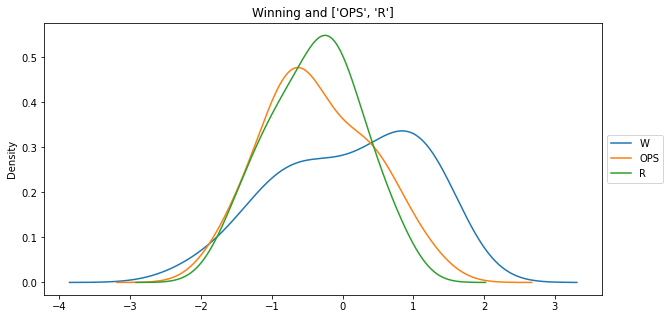

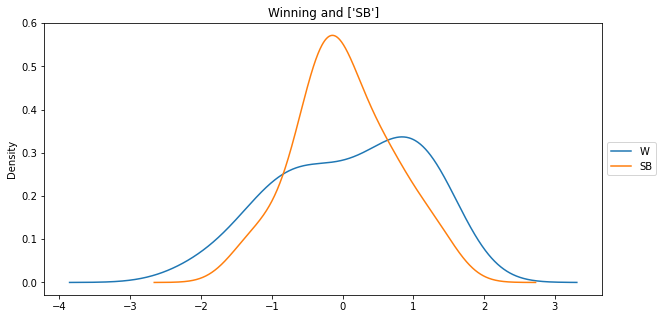

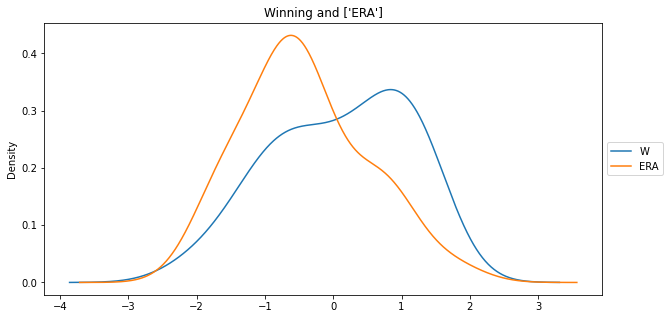

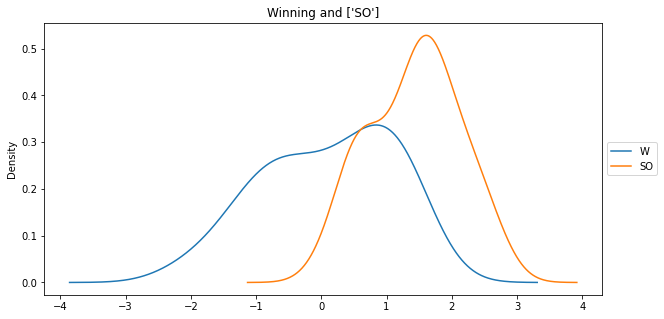

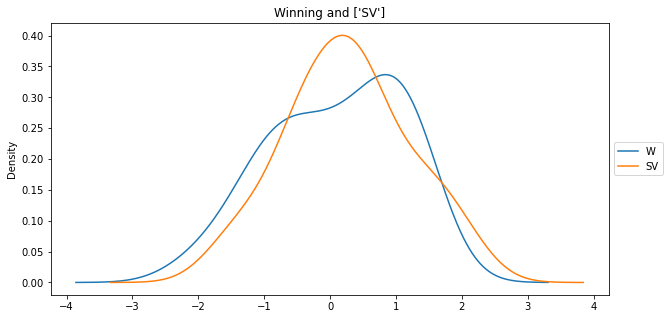

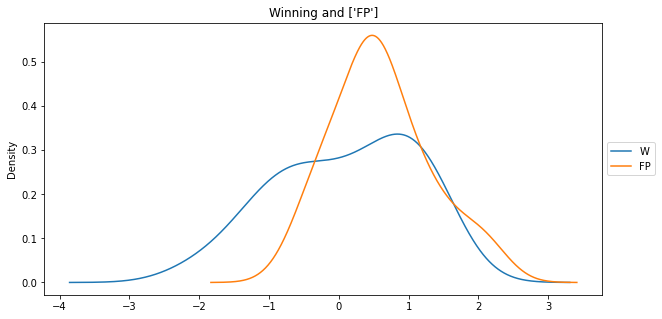

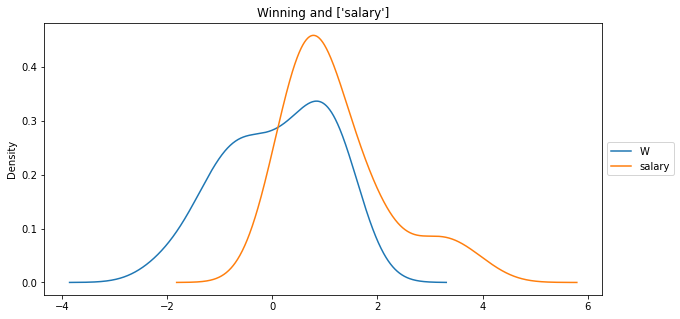

In [203]:
# columns = ['salary', 'OBP', 'SLG', 'OPS']

columns_1 = ['W', 'OPS', 'R']
columns_2 = ['W', 'salary']
columns_3 = ['W', 'FP']
columns_4 = ['W', 'ERA'] 

columns_5 = ['W', 'SB']

columns_6 = ['W', 'SO']
columns_7 = ['W', 'SV']

# offensive
show_plot(mlb_df, columns_1, 2012)
show_plot(mlb_df, columns_5, 2012)
#pitching
show_plot(mlb_df, columns_4, 2012)
show_plot(mlb_df, columns_6, 2012)
show_plot(mlb_df, columns_7, 2012)
# defensive
show_plot(mlb_df, columns_3, 2012)
# payroll
show_plot(mlb_df, columns_2, 2012)


### Hypothesis Test

In [253]:
def hypothesis_check(df, year, target):
    team_arr = df['franchID'].unique()
    for team in team_arr:
        sample1_df = df.loc[(df['yearID']<year) & (df['franchID']==team)]
        sample2_df = df.loc[(df['yearID']>=year) & (df['franchID']==team)]
        sample1_arr = sample1_df[target].values
        sample2_arr = sample2_df[target].values
#         print(team + ' ' + target + ' sample 1 mean = ' + str(sample1_df[target].mean()))
#         print(team + ' ' + target + ' sample 2 mean = ' + str(sample2_df[target].mean()))
        sta, p = stats.ttest_ind(sample1_arr, sample2_arr)
        print(team + ' ' + target + ' 2 tail p value = ' + str(float(2*p)))


ATL salary 2 tail p value = 7.175673816514508e-08
BAL salary 2 tail p value = 0.0002196052813256595
BOS salary 2 tail p value = 1.1025166513129516e-11
ANA salary 2 tail p value = 4.689217085142077e-09
CHW salary 2 tail p value = 5.1595652995166545e-08
CHC salary 2 tail p value = 6.46365788841583e-09
CIN salary 2 tail p value = 1.217431608078221e-06
CLE salary 2 tail p value = 0.001238561343149041
DET salary 2 tail p value = 6.187849241875681e-07
HOU salary 2 tail p value = 1.2007556373996102e-09
KCR salary 2 tail p value = 7.254778484057031e-06
LAD salary 2 tail p value = 2.0409022155989097e-09
MIN salary 2 tail p value = 5.597447702204691e-07
MIL salary 2 tail p value = 1.4709646406064564e-06
WSN salary 2 tail p value = 5.712347122061412e-10
NYY salary 2 tail p value = 2.2863760281808806e-12
NYM salary 2 tail p value = 9.604609832542059e-11
OAK salary 2 tail p value = 2.872732240747479e-07
PHI salary 2 tail p value = 2.347101672123092e-07
PIT salary 2 tail p value = 1.719068803606525e

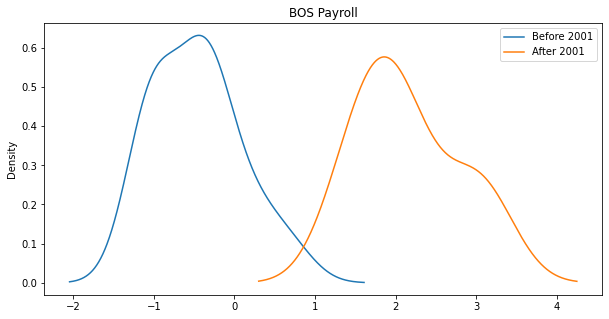

In [300]:
# Hypothesis Test

hypothesis_check(mlb_df, 2001, 'salary')
hypothesis_check(mlb_df, 2001, 'OPS')
hypothesis_check(mlb_df, 2001, 'ERA')

df1 = mlb_df.loc[(mlb_df['yearID']<2001) & (mlb_df['franchID']=='BOS')]
df2 = mlb_df.loc[(mlb_df['yearID']>=2001) & (mlb_df['franchID']=='BOS')]
df1['salary'].plot(figsize=(10,5), kind='kde', legend=True, label='Before 2001', title='BOS Payroll')
df2['salary'].plot(figsize=(10,5), kind='kde', legend=True, label='After 2001')
# print(stats.shapiro(win_arr))
# print(stats.shapiro(salary_arr))